## Logging - 로그 남기기
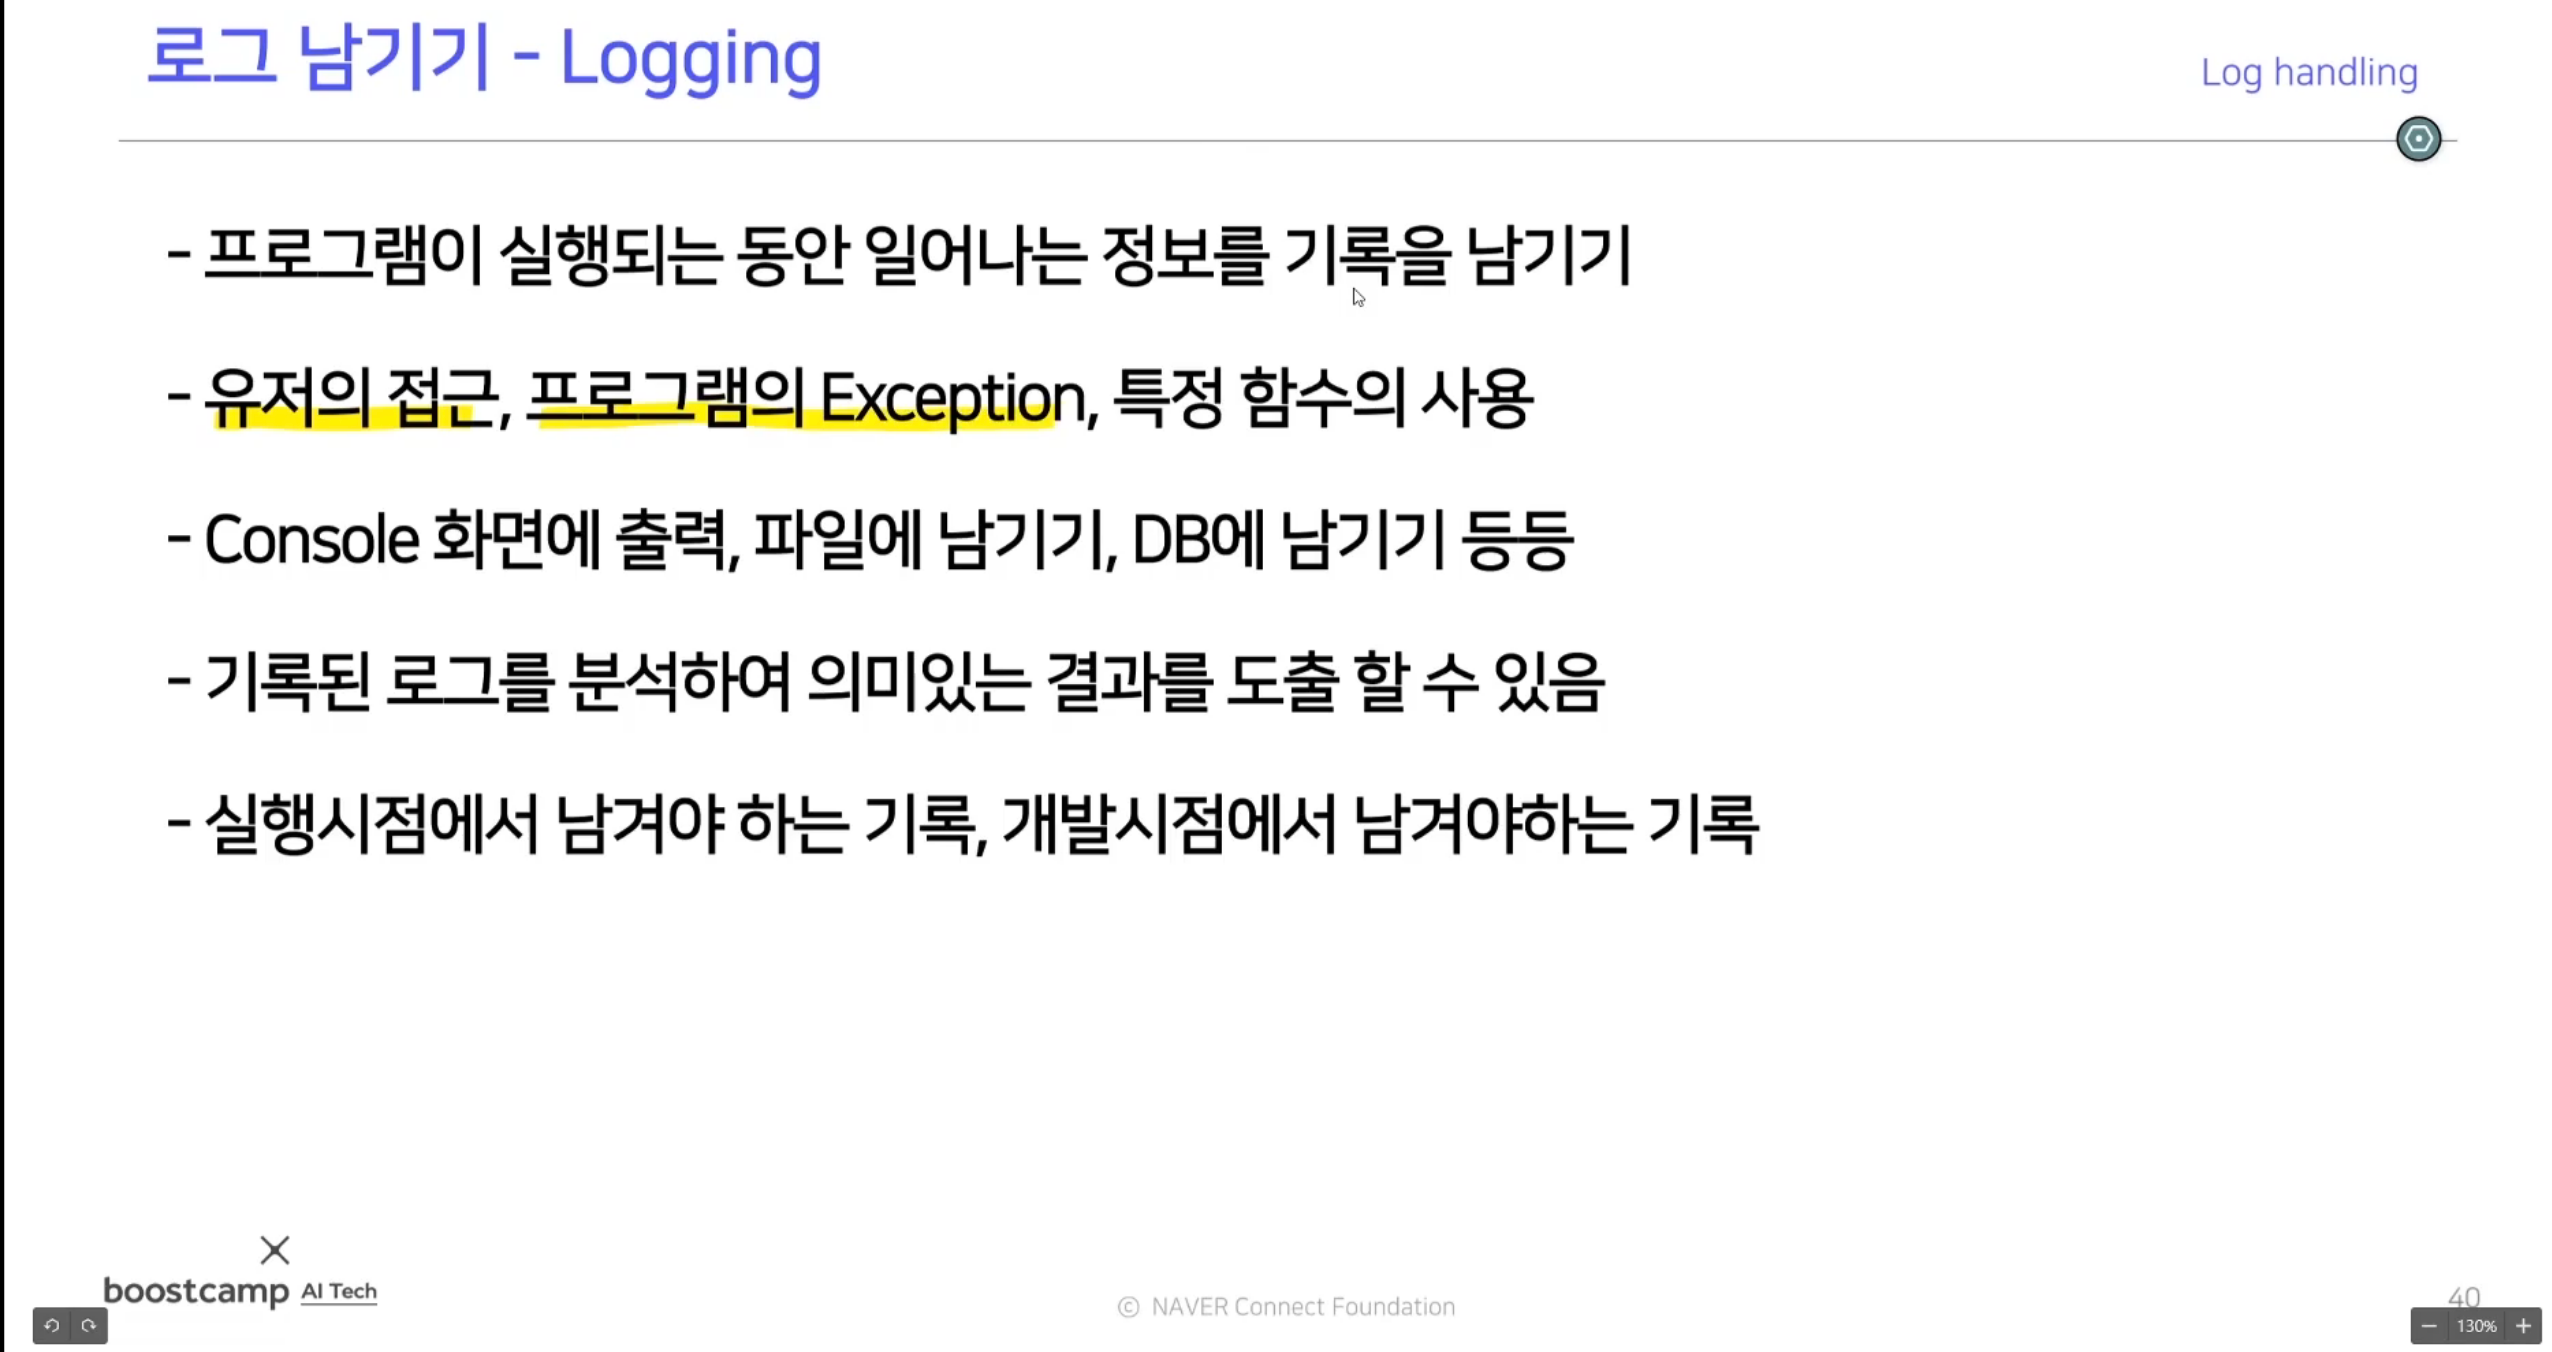

### logging 모듈 - 레벨
- DEBUG -> INFO -> WARNING -> ERROR -> CRITICAL
<img src=https://blog.kakaocdn.net/dn/c4BUlp/btrGhVQ5EVL/VijYsytwX9v8vPTUk08hS0/img.png width=1000>

In [1]:
import logging

if __name__=='__main__':
    logger = logging.getLogger("main")
    # default 레벨은 warning부터
    # level을 Debug로 바꿔서 모든 로깅 다 나오게 설정
    logging.basicConfig(level=logging.DEBUG) 
    
    logger.debug("디버그")
    logger.info("인포")
    logger.warning("워닝")
    logger.error("에뤄")
    logger.critical("크뤼티칼!")

DEBUG:main:디버그
INFO:main:인포
ERROR:main:에뤄
CRITICAL:main:크뤼티칼!


### logging 설정
1. configparser - 파일로 환경설정
2. argparser - 코드로 환경설정(실행시점에)

 #### configparser
- Section, Key, Value 값의 형태의 환경설정 File 사용
- 설정 파일을 Dict Type으로 호출해서 사용

In [2]:
!cat example.cfg

[SectionOne]
Status: Single
Name: Derek
Value: Yes
Age: 30
Single: True

[SectionTwo]
FavoriteColor = Green

[SectionThree]
FamilyName: Johnson

In [3]:
import configparser
config = configparser.ConfigParser()
config.sections()
config.read('example.cfg')
config.sections()

['SectionOne', 'SectionTwo', 'SectionThree']

In [8]:
print(f"config 타입: {type(config)}\ncofig: {config}")

config 타입: <class 'configparser.ConfigParser'>
cofig: <configparser.ConfigParser object at 0x105680b20>


In [16]:
# config의 SectionOne key값 출력
for key in config['SectionOne']:
    print(key)
# config의 SectionOne status의 값 출력 (대소문자 상관없는듯)    
config['SectionOne']["status"]

status
name
value
age
single


'Single'

#### argparser
- Command-Line Option으로 프로그램 실행시 세팅
- 대부분의 Console 기반 Python 프로그램이 기본으로 제공

In [30]:
import argparse
parser = argparse.ArgumentParser(description='Sum two integers.')
parser.add_argument('-a', "--a_value", dest="A_value", help="A integers", type=int)
parser.add_argument('-b', "--b_value", dest="B_value", help="B integers", type=int)

args = parser.parse_args(args=[]) # args=[]를 넣어줘야 주피터에서 실행된다.
print(args)
args.a, args.b = map(int, input("a, b:").split(',')) # 주피터에서 argparse 쓰기위해 input을 사용

print(args.a)
print(args.b)
print(args.a + args.b)

Namespace(A_value=None, B_value=None)
a, b:10, 20
10
20
30


### Logging formmater

In [1]:
import logging

if __name__=='__main__':
    # 날짜 시간  레벨  processID  메시지
    formatter = logging.Formatter('%(asctime)s %(levelname)s %(process)d %(message)s')
    logger = logging.getLogger()
    
    # formatter 추가 -> stream_handler
    stream_handler = logging.StreamHandler()
    stream_handler.setFormatter(formatter)
    logger.addHandler(stream_handler)
    
    # default 레벨은 warning부터
    # level을 Debug로 바꿔서 모든 로깅 다 나오게 설정
    logging.basicConfig(level=logging.DEBUG)
    
    logger.debug("디버그")
    logger.info("인포")
    logger.warning("워닝")
    logger.error("에뤄")
    logger.critical("크뤼티칼!")

2022-07-01 22:05:38,807 WARNING 76771 워닝
2022-07-01 22:05:38,812 ERROR 76771 에뤄
2022-07-01 22:05:38,813 CRITICAL 76771 크뤼티칼!


#### logging.conf 파일 읽어와서 로깅

In [2]:
import logging
import logging.config

logging.config.fileConfig('logging.conf')
conf_logger = logging.getLogger()

logger.debug("디버그")
logger.info("인포")
logger.warning("워닝")
logger.error("에뤄")
logger.critical("크뤼티칼!")

2022.07.01 10:11:44 PM - root - DEBUG - 디버그
2022.07.01 10:11:44 PM - root - INFO - 인포
2022.07.01 10:11:44 PM - root - WARNING - 워닝
2022.07.01 10:11:44 PM - root - ERROR - 에뤄
2022.07.01 10:11:44 PM - root - CRITICAL - 크뤼티칼!
